In [2]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json

# Load datasets
graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
# P_N = students_data['P_N']  # Liczba studentów
P_N = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu
P_N_SEMESTR = graduates_data['P_N_SEMESTR'] # Liczba semestrów
P_NAZWA_UCZELNI = graduates_data['P_NAZWA_UCZELNI'] # Nazwa uczelni

# Convert selected columns with numeric strings to float
for col in graduates_data.columns:
    if any(keyword in col for keyword in ['P_ME', 'P_WWZ', 'P_WWB', 'P_CZAS']):
        graduates_data[col] = graduates_data[col].astype(str).str.replace(',', '.')
        graduates_data[col] = pd.to_numeric(graduates_data[col], errors='coerce')


/tmp/ipykernel_16155/4222050872.py:9: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_16155/4222050872.py:10: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memor

In [3]:
# Function to map a field to a category based on keywords
def add_field_column(dataframe, column_name):
    """
    Add a new column 'Dziedzina' to the given DataFrame based on keywords in the specified column.
    
    Args:
        dataframe (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column containing course names.

    Returns:
        pd.DataFrame: The updated DataFrame with the new 'Dziedzina' column.
    """
    # Dictionary mapping phrases to fields
    keywords_to_dziedzina = {
        "Prawo": "Nauki prawne",
        "Psychol": "Nauki społeczne",
        "Automat": "Automatyka",
        "Informat": "Informatyka",
        "Zarządzanie": "Zarządzanie",
        "lekarski": "Medycyna",
        "Ekonom": "Ekonomia",
        "Mechani": "Inżynieria mechaniczna",
        "Chem": "Nauki ścisłe",
        "Budowni": "Inżynieria lądowa",
        "Archit": "Architektura",
        "Elektr": "Inżynieria elektryczna",
        "środowi": "Inżynieria środowiskowa",
    }
    
    # Function to assign a field based on keywords
    def assign_field(course_name):
        for keyword, field in keywords_to_dziedzina.items():
            if keyword.lower() in course_name.lower():  # Check if keyword exists in the course name
                return field
        return "Inne"  # Assign "Inne" if no match is found

    # Apply the function to create the new column
    dataframe['Dziedzina'] = dataframe[column_name].apply(assign_field)

    return dataframe

# Apply the function to the graduates_data DataFrame
graduates_data = add_field_column(graduates_data, 'P_KIERUNEK_NAZWA')

# The graduates_data DataFrame now includes the 'Dziedzina' column
print("The column 'Dziedzina' has been successfully added.")

def add_adjusted_salary_column(data, median_dict):
    """
    Adds a column to the graduates_data DataFrame where the value is P_ME_ZAR_P2 
    divided by the median salary based on the year in P_ROKDYP.

    Args:
        data (pd.DataFrame): The graduates_data DataFrame.
        median_dict (dict): A dictionary containing median salaries for specific years.

    Returns:
        pd.DataFrame: The updated DataFrame with the new column.
    """
    def calculate_adjusted_salary(row):
        year = row['P_ROKDYP']
        if year in median_dict:
            return row['P_ME_ZAR_P2'] / median_dict[year]
        return None  # Return None if the year is not in the median dictionary

    # Add the new column to the DataFrame
    data['P_WWZ_P2'] = data.apply(calculate_adjusted_salary, axis=1)

    return data

# Define the median dictionary
median = {
    2014: 3291.56,
    2016: 3510.67,
    2018: 4094.98,
    2020: 4702.66,
    2022: 5701.62,
}

# Add the new column to graduates_data
graduates_data = add_adjusted_salary_column(graduates_data, median)

# Inspect the DataFrame to ensure the column was added
print(graduates_data[['P_ROKDYP', 'P_ME_ZAR_P2', 'P_WWZ_P2']].head())


/tmp/ipykernel_16155/537383189.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['Dziedzina'] = dataframe[column_name].apply(assign_field)


The column 'Dziedzina' has been successfully added.
   P_ROKDYP  P_ME_ZAR_P2  P_WWZ_P2
0      2018      2763.91  0.674951
1      2018      1756.32  0.428896
2      2018      2842.93  0.694248
3      2018      4854.17  1.185395
4      2018      4139.02  1.010755


In [4]:
# Create a dictionary to store mappings for each column
label_mappings = {}

# Encode variables and save mappings
for column in ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']:
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform the column
    graduates_data[column] = label_encoder.fit_transform(graduates_data[column])
    
    # Store the mapping: original value -> encoded value
    label_mappings[column] = {original: encoded for encoded, original in enumerate(label_encoder.classes_)}

# Save mappings to a file (optional)
import json
with open('label_mappings.json', 'w', encoding='utf-8') as f:
    json.dump(label_mappings, f, ensure_ascii=False, indent=4)

# Print the mappings
for column, mapping in label_mappings.items():
    print(f"Mapping for {column}:")
    for original, encoded in mapping.items():
        print(f"  {original}: {encoded}")

Mapping for P_WOJ:
  2.0: 0
  4.0: 1
  6.0: 2
  8.0: 3
  10.0: 4
  12.0: 5
  14.0: 6
  16.0: 7
  18.0: 8
  20.0: 9
  22.0: 10
  24.0: 11
  26.0: 12
  28.0: 13
  30.0: 14
  32.0: 15
  nan: 16
Mapping for P_POZIOM:
  1: 0
  2: 1
  JM: 2
Mapping for P_FORMA:
  N: 0
  S: 1
Mapping for Dziedzina:
  Architektura: 0
  Automatyka: 1
  Ekonomia: 2
  Informatyka: 3
  Inne: 4
  Inżynieria elektryczna: 5
  Inżynieria lądowa: 6
  Inżynieria mechaniczna: 7
  Inżynieria środowiskowa: 8
  Medycyna: 9
  Nauki prawne: 10
  Nauki społeczne: 11
  Nauki ścisłe: 12
  Zarządzanie: 13


In [5]:
import json

# Path to the .json file
file_path = 'label_mappings.json'

# Load the .json file
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Now `data` is a regular Python dictionary
print(type(data))  # <class 'dict'>
print(data)

# Function to find a key based on a value
def get_key_from_value(mapping, value):
    reverse_mapping = {v: k for k, v in mapping.items()}
    return reverse_mapping.get(value, "Value not found")

# Example usage
value_to_find = 0
result = get_key_from_value(data['P_FORMA'], value_to_find)
print(result)

<class 'dict'>
{'P_WOJ': {'2.0': 0, '4.0': 1, '6.0': 2, '8.0': 3, '10.0': 4, '12.0': 5, '14.0': 6, '16.0': 7, '18.0': 8, '20.0': 9, '22.0': 10, '24.0': 11, '26.0': 12, '28.0': 13, '30.0': 14, '32.0': 15, 'NaN': 16}, 'P_POZIOM': {'1': 0, '2': 1, 'JM': 2}, 'P_FORMA': {'N': 0, 'S': 1}, 'Dziedzina': {'Architektura': 0, 'Automatyka': 1, 'Ekonomia': 2, 'Informatyka': 3, 'Inne': 4, 'Inżynieria elektryczna': 5, 'Inżynieria lądowa': 6, 'Inżynieria mechaniczna': 7, 'Inżynieria środowiskowa': 8, 'Medycyna': 9, 'Nauki prawne': 10, 'Nauki społeczne': 11, 'Nauki ścisłe': 12, 'Zarządzanie': 13}}
N


In [6]:
median = {
2014: 3291.56,
2016: 3510.67,
2018: 4094.98,
2020: 4702.66,
2022: 5701.62,
}

years = [2014, 2016, 2018, 2020, 2022]

graduates_data = graduates_data[graduates_data['P_ROKDYP'].isin(years)]

graduates_data['P_ROKDYP'].describe

<bound method NDFrame.describe of 0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
62941    2014
62942    2014
62943    2014
62944    2014
62945    2014
Name: P_ROKDYP, Length: 34847, dtype: int64>

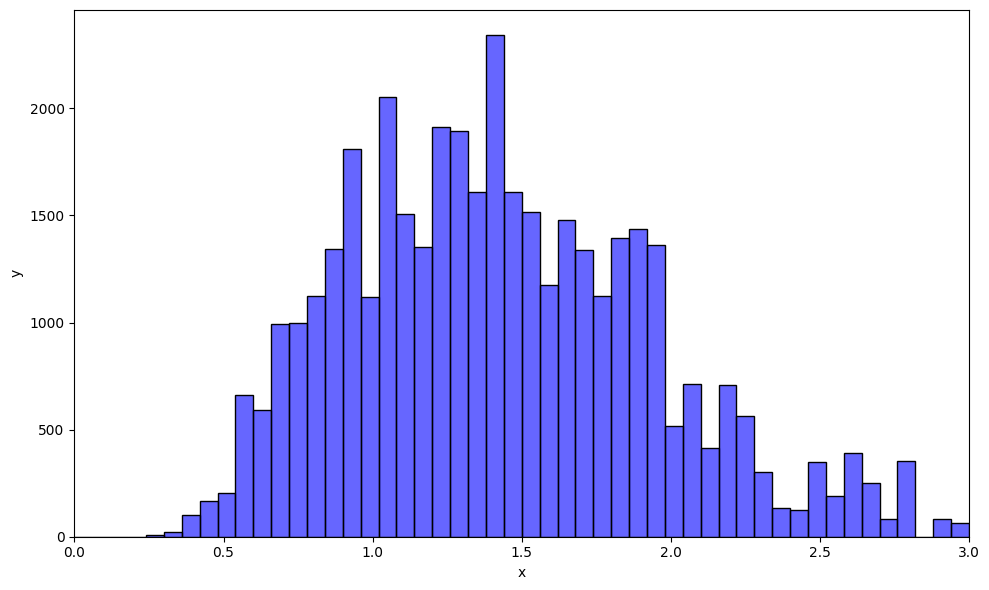

In [7]:
num_bins = 50
x_range = (0, 3)

temp_data = graduates_data[['P_N', 'P_ME_ZAR_P2', 'Dziedzina', 'P_WWZ_P2', 'P_FORMA']].copy()

# temp_data = temp_data[temp_data['Dziedzina']]

temp_data = temp_data[temp_data['Dziedzina'] == 3]

temp_data = temp_data[temp_data['P_FORMA'] == 1]

temp_data.describe

plt.figure(figsize=(10, 6))
sns.histplot(
    data=temp_data, 
    x='P_WWZ_P2', 
    weights='P_N', 
    bins=num_bins, 
    binrange=x_range, 
    kde=False, 
    color='blue',
    edgecolor="black", 
    alpha=0.6, 
    stat="count"
)
# sns.lineplot(data=temp_data, x=i, y=f'P_WWZ_MIES_{i}')
# sns.scatterplot(data=temp_data, x=i, y=f'P_WWZ_MIES_{i}')

# plt.title('Test')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_range)
plt.tight_layout()
plt.show()

Architektura


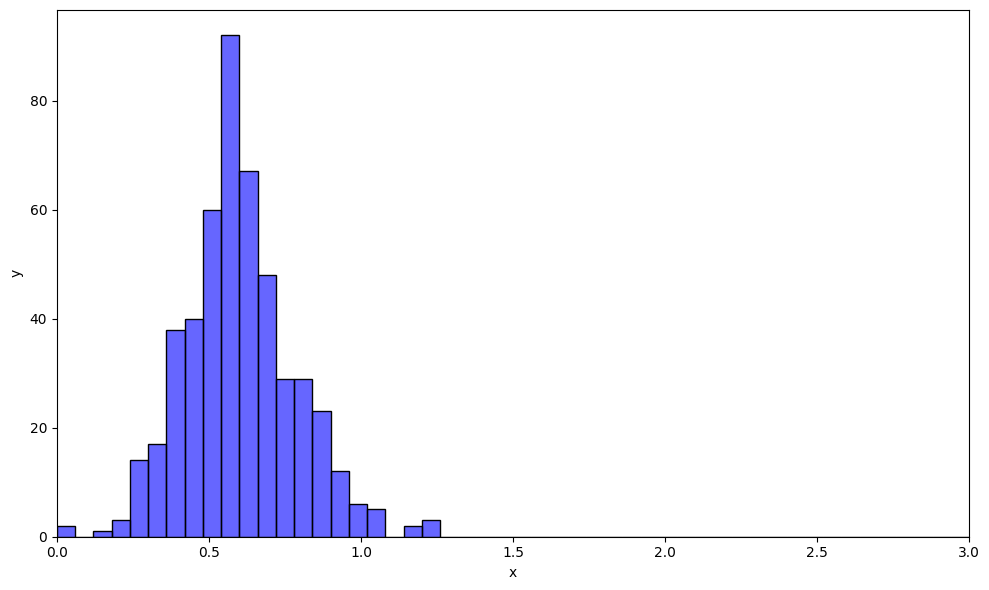

Automatyka


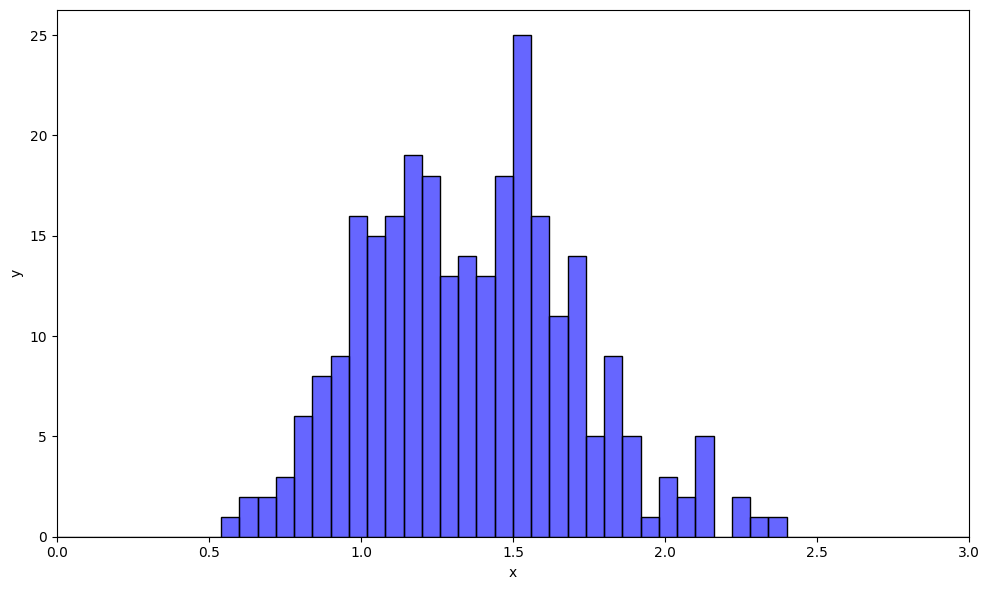

Ekonomia


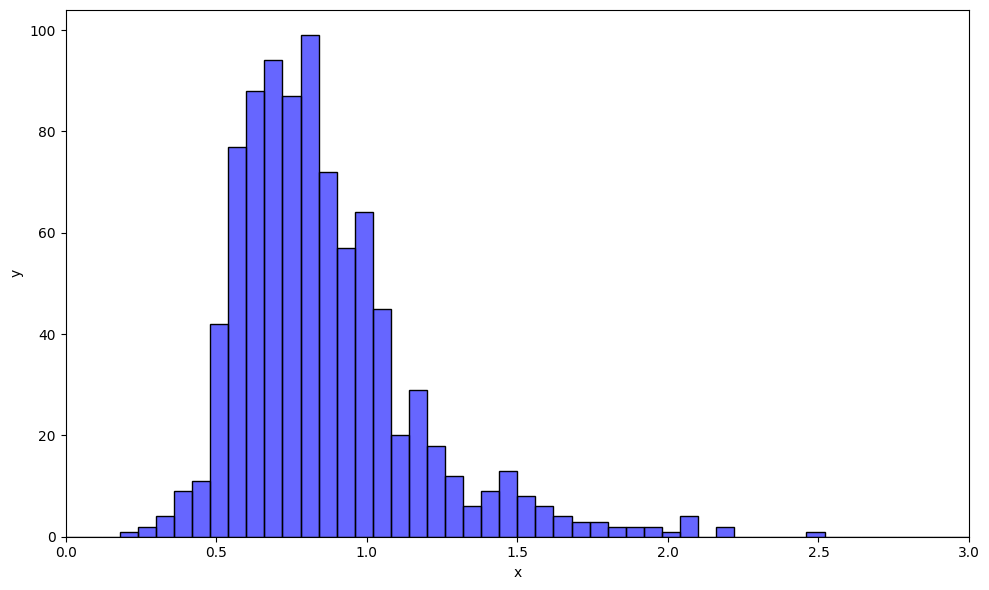

Informatyka


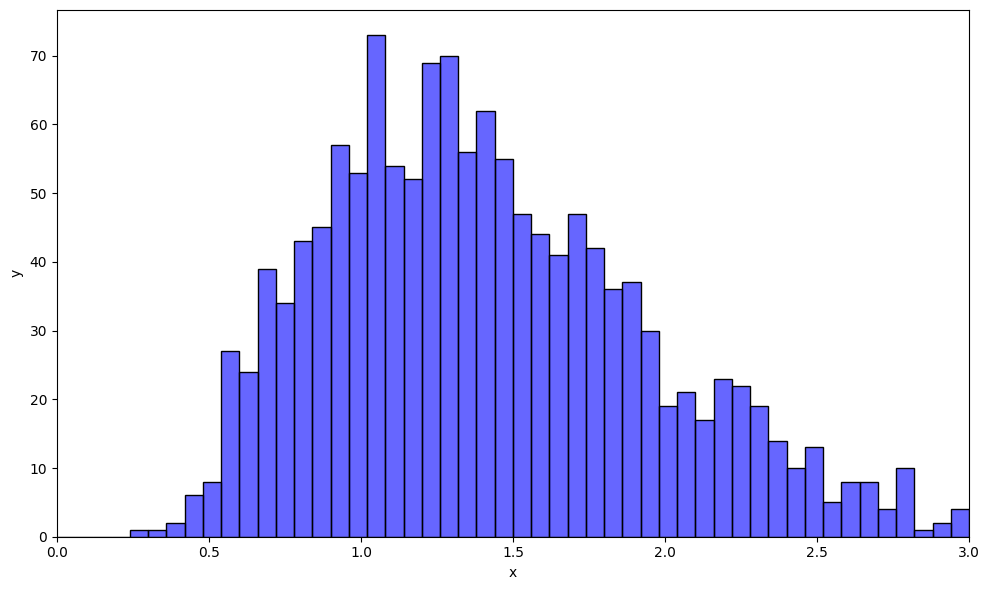

Inne


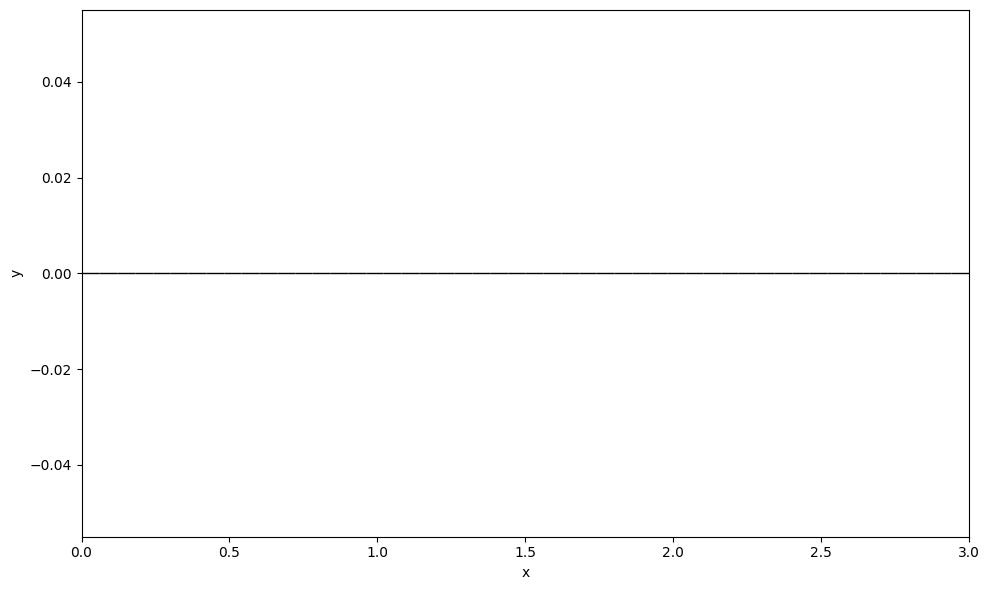

Inżynieria elektryczna


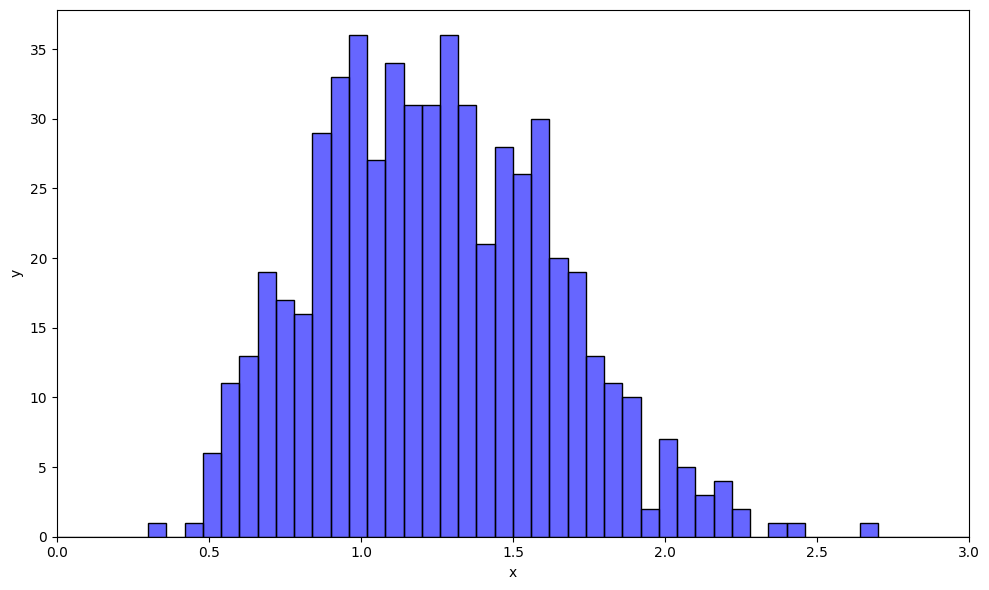

Inżynieria lądowa


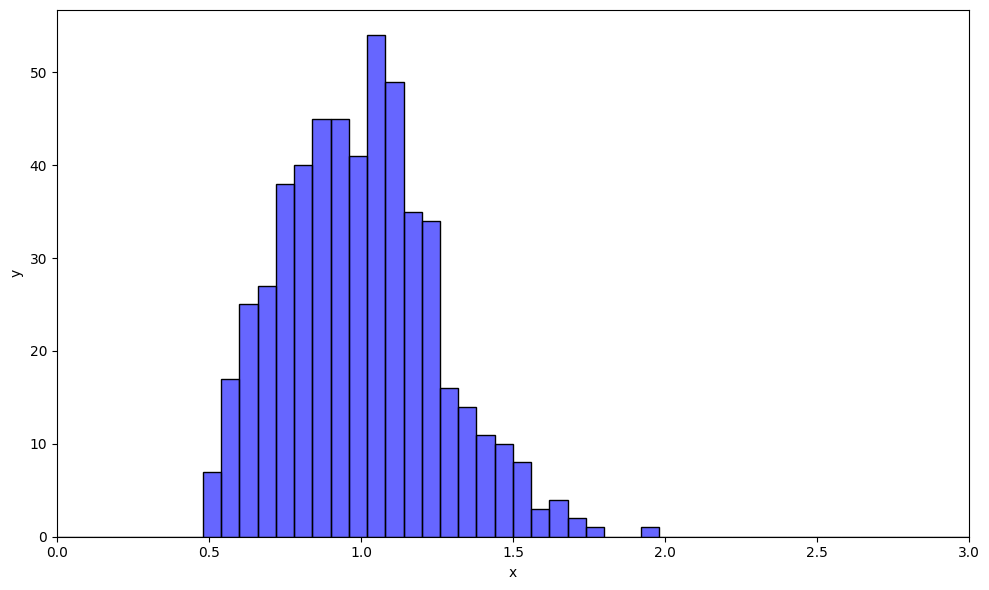

Inżynieria mechaniczna


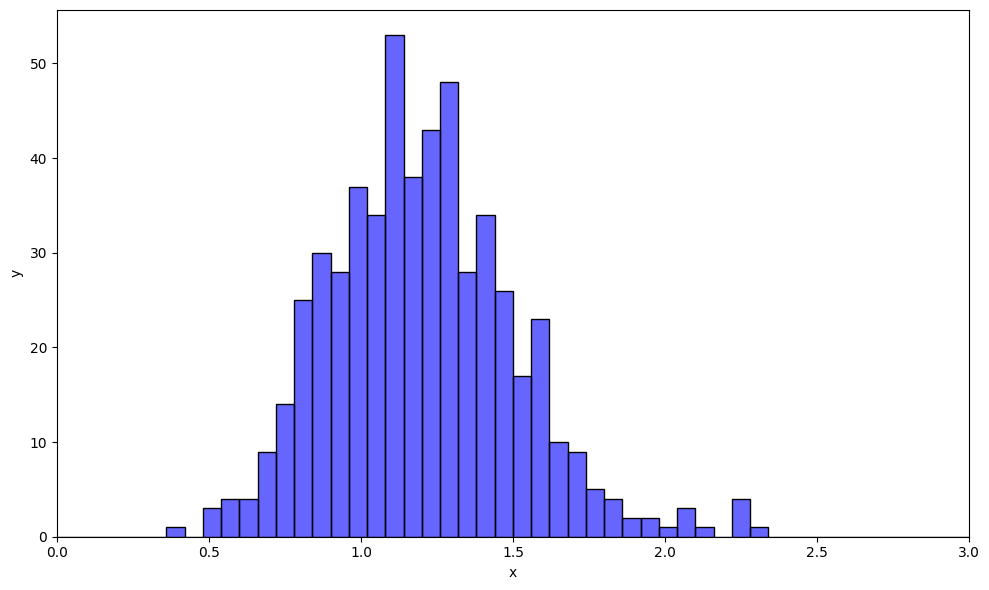

Inżynieria środowiskowa


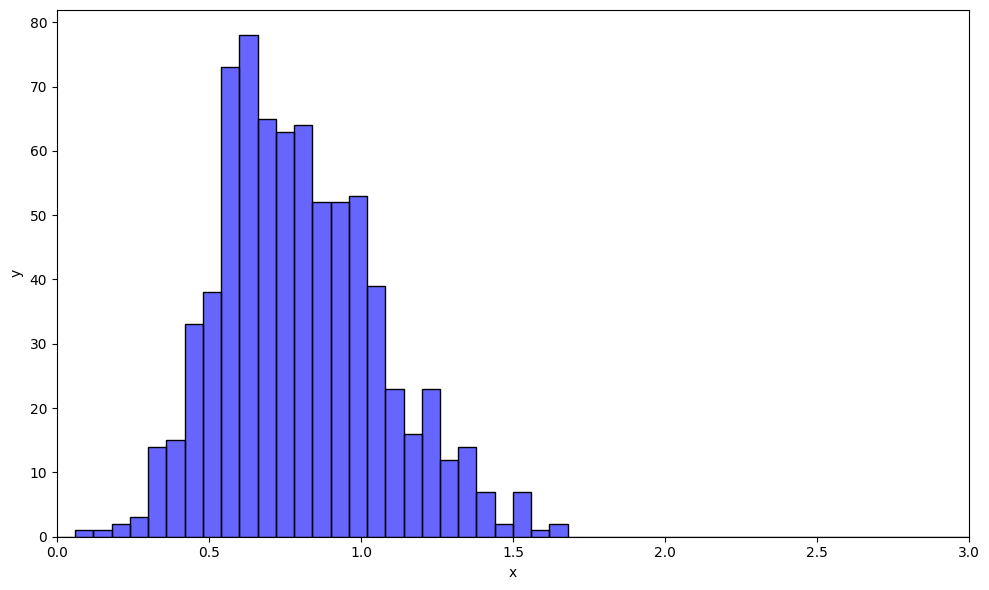

Medycyna


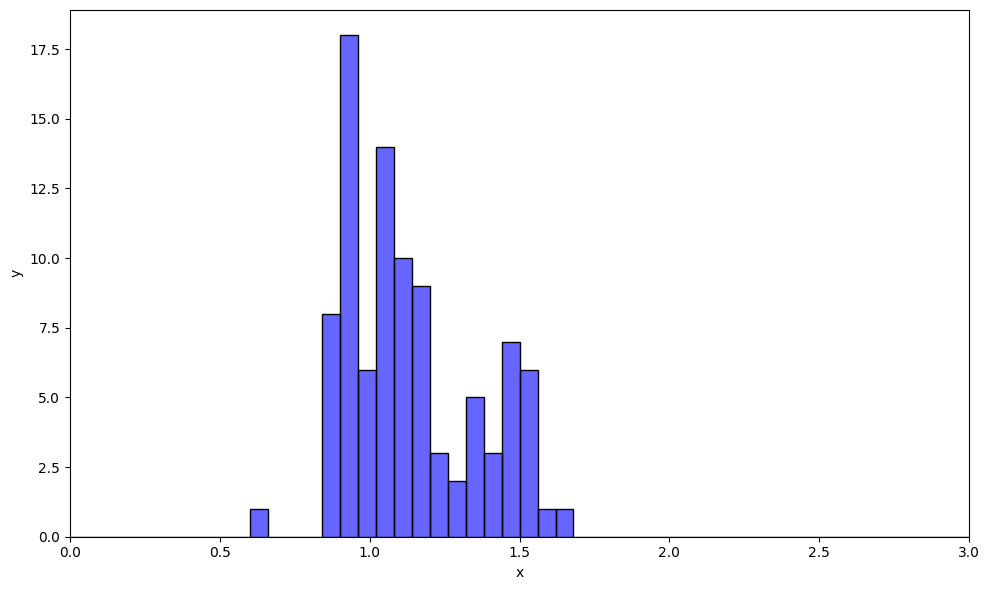

Nauki prawne


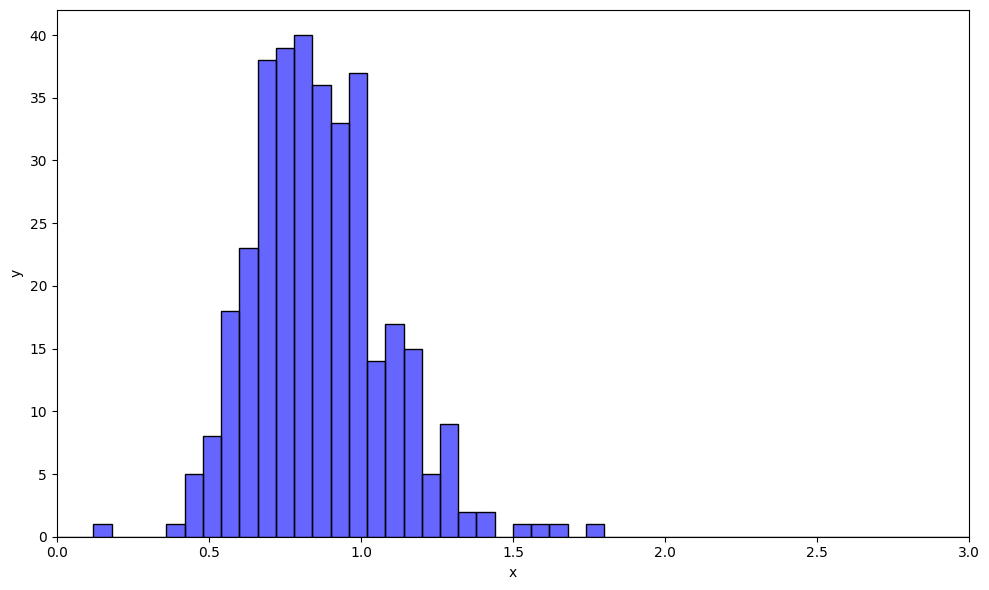

Nauki społeczne


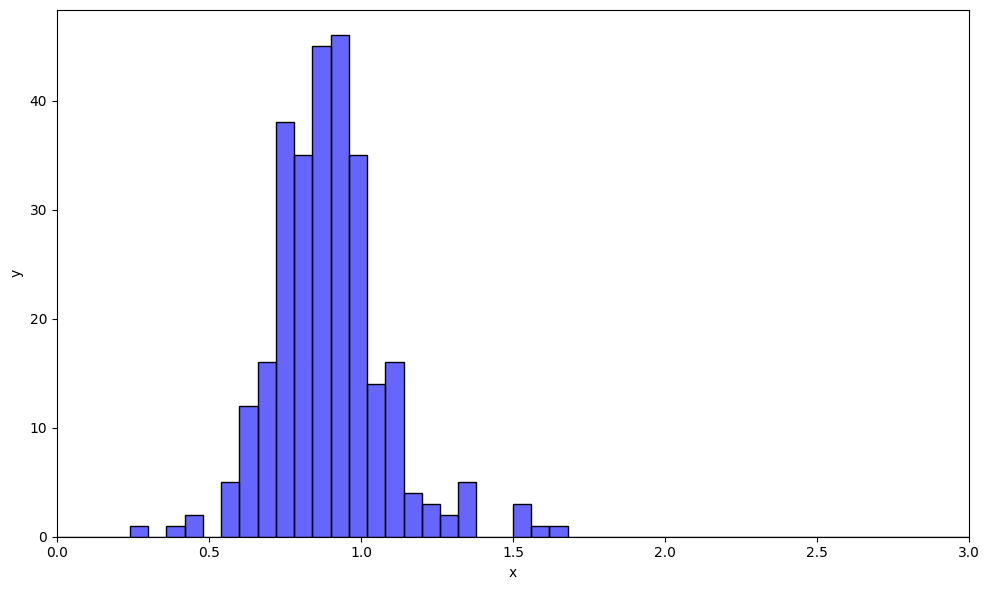

Nauki ścisłe


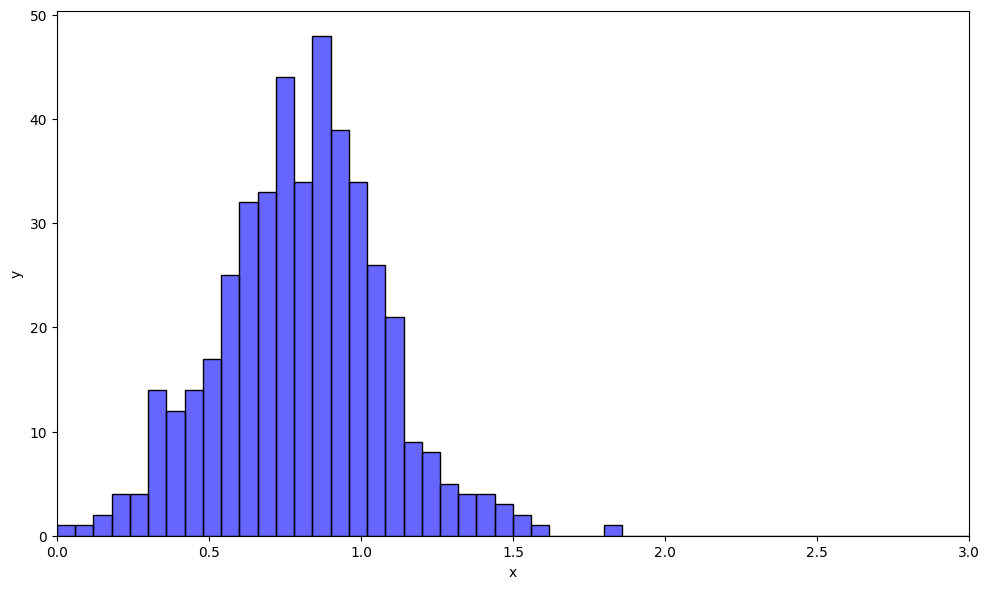

In [111]:
num_bins = 50
x_range = (0, 3)

temp_data = graduates_data[['P_N', 'P_ME_ZAR_P2', 'Dziedzina', 'P_WWZ_P2', 'P_FORMA']].copy()

for i in (range(0,13)):    
    print(get_key_from_value(data['Dziedzina'], i))
    temp_data = graduates_data[['P_N', 'P_ME_ZAR_P2', 'Dziedzina', 'P_WWZ_P2', 'P_FORMA']].copy()
    temp_data = temp_data[temp_data['Dziedzina'] == i]

    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=temp_data, 
        x='P_WWZ_P2', 
        # weights='P_N', 
        bins=num_bins, 
        binrange=x_range, 
        kde=False, 
        color='blue',
        edgecolor="black", 
        alpha=0.6, 
        stat="count"
    )
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(x_range)
    plt.tight_layout()
    plt.show()
# sns.lineplot(data=temp_data, x=i, y=f'P_WWZ_MIES_{i}')
# sns.scatterplot(data=temp_data, x=i, y=f'P_WWZ_MIES_{i}')

# plt.title('Test')


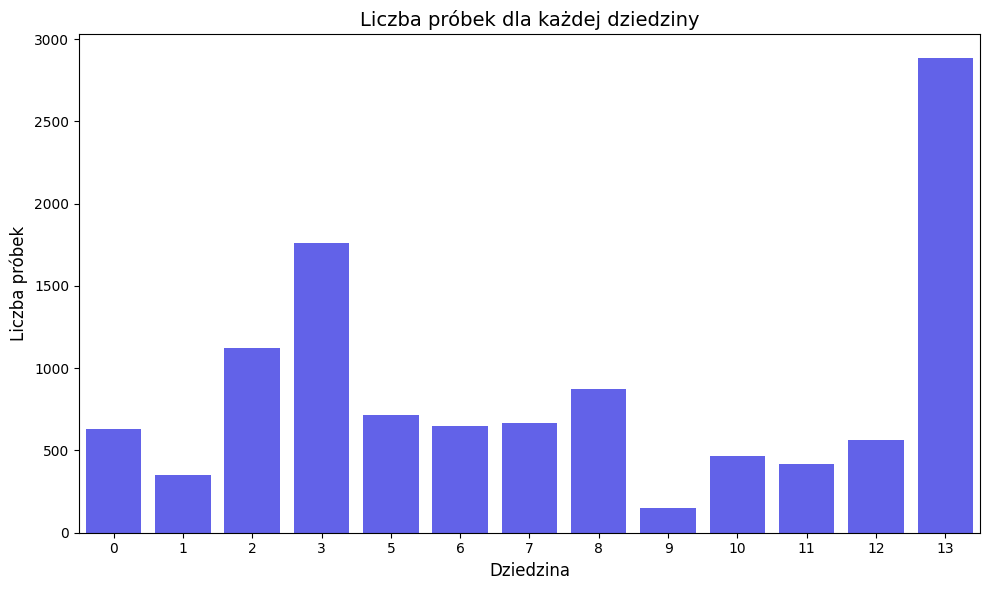

Inne


In [119]:
temp_data = graduates_data[['Dziedzina']].copy()

temp_data = temp_data[temp_data['Dziedzina'] != 4]

# Grupowanie danych po kolumnie 'Dziedzina' i liczenie próbek
sample_counts = temp_data.groupby('Dziedzina').size()

# Tworzenie wykresu kolumnowego
plt.figure(figsize=(10, 6))
sns.barplot(x=sample_counts.index, y=sample_counts.values, color='blue', alpha=0.7)

# Dodanie tytułów i etykiet
plt.title('Liczba próbek dla każdej dziedziny', fontsize=14)
plt.xlabel('Dziedzina', fontsize=12)
plt.ylabel('Liczba próbek', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

print(get_key_from_value(data['Dziedzina'], 4))

Epoch 1/50, Training Loss: 39.2703
Current Learning Rate: 0.001
Epoch 2/50, Training Loss: 28.1524
Current Learning Rate: 0.001
Epoch 3/50, Training Loss: 25.4038
Current Learning Rate: 0.001
Epoch 4/50, Training Loss: 24.4627
Current Learning Rate: 0.001
Epoch 5/50, Training Loss: 23.8660
Current Learning Rate: 0.001
Epoch 6/50, Training Loss: 23.3193
Current Learning Rate: 0.001
Epoch 7/50, Training Loss: 22.8328
Current Learning Rate: 0.001
Epoch 8/50, Training Loss: 22.3925
Current Learning Rate: 0.001
Epoch 9/50, Training Loss: 22.0462
Current Learning Rate: 0.001
Epoch 10/50, Training Loss: 21.7356
Current Learning Rate: 0.0005
Epoch 11/50, Training Loss: 20.8573
Current Learning Rate: 0.0005
Epoch 12/50, Training Loss: 20.6807
Current Learning Rate: 0.0005
Epoch 13/50, Training Loss: 20.5708
Current Learning Rate: 0.0005
Epoch 14/50, Training Loss: 20.4549
Current Learning Rate: 0.0005
Epoch 15/50, Training Loss: 20.3538
Current Learning Rate: 0.0005
Epoch 16/50, Training Loss: 

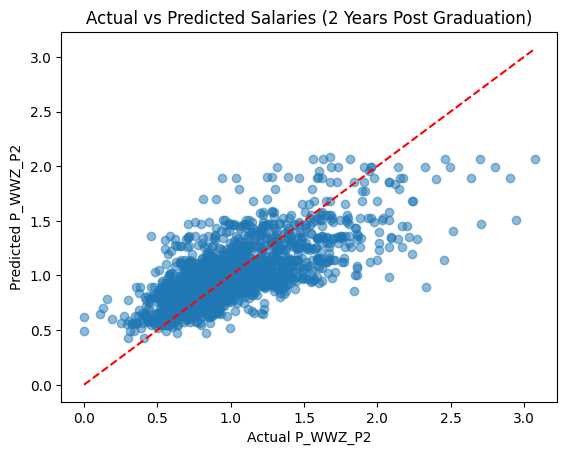

In [122]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the data for training
# Select the numeric columns and the target variable

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 4]
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy =graduates_data_copy.dropna(subset=columns_to_check)


features = graduates_data_copy[['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']]
target = graduates_data_copy['P_WWZ_P2']


# Scale the features for better performance
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Define the deep neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)        # Second hidden layer
        self.fc3 = nn.Linear(64, 32)         # Third hidden layer
        self.fc4 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]
model_1 = RegressionModel(input_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression tasks

# Training loop
epochs = 50
batch_size = 32

# Define optimizer with scheduler
optimizer = optim.Adam(model_1.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# Training loop with validation
for epoch in range(epochs):
    model_1.train()
    epoch_loss = 0.0
    for i in range(0, X_train_tensor.size(0), batch_size):
        batch_x = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model_1(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Step the scheduler
    scheduler.step()

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {epoch_loss:.4f}")
    print(f"Current Learning Rate: {scheduler.optimizer.param_groups[0]['lr']}")

# for epoch in range(epochs):
#     model_1.train()
#     permutation = torch.randperm(X_train_tensor.size(0))
#     epoch_loss = 0.0

#     for i in range(0, X_train_tensor.size(0), batch_size):
#         indices = permutation[i:i+batch_size]
#         batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

#         # Zero the parameter gradients
#         optimizer.zero_grad()

#         # Forward pass
#         outputs = model_1(batch_x)
#         loss = criterion(outputs, batch_y)

#         # Backward pass and optimize
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()

#     print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# Evaluate the model on the test set
model_1.eval()
with torch.no_grad():
    predictions = model_1(X_test_tensor).numpy()


test_predictions = predictions
y_test_actual = y_test_tensor.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")

# Visualize the predictions
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual P_WWZ_P2")
plt.ylabel("Predicted P_WWZ_P2")
plt.title("Actual vs Predicted Salaries (2 Years Post Graduation)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
plt.show()


In [123]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Check for GPU availability
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# Define the predict_salary function
def predict_salary(model, input_features, scaler):
    """
    Predicts salary using the trained PyTorch model.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        input_features (list or dict): Input features in the order:
            ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']

    Returns:
        float: Predicted salary.
    """
    # Convert input features to a NumPy array if not already
    if isinstance(input_features, dict):
        input_values = [input_features[key] for key in input_features.keys()]
    else:
        input_values = input_features

    # Scale the input features
    input_values_scaled = scaler.transform([input_values])

    # Convert to PyTorch tensor and move to the same device as the model
    input_tensor = torch.tensor(input_values_scaled, dtype=torch.float32)

    # Make prediction
    model.eval()
    with torch.no_grad():
        predicted_salary = model(input_tensor).cpu().numpy()[0, 0]

    return predicted_salary


# Corrected example input (exclude 'P_ME_ZAR' because it's the target variable)
example_input = {

    'P_WOJ': 6, 
    'P_POZIOM': 1,  
    'P_FORMA': 0,  
    'Dziedzina': 3 
}

# Predict salary
predicted_salary = predict_salary(model_1, example_input, scaler)
print(f"Predicted salary: {predicted_salary:.4f} x Median Salary")


Predicted salary: 2.0678 x Median Salary


/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Epoch 1/50, Training Loss: 0.1994, Validation Loss: 0.1065
Epoch 2/50, Training Loss: 0.1110, Validation Loss: 0.0931
Epoch 3/50, Training Loss: 0.1008, Validation Loss: 0.0971
Epoch 4/50, Training Loss: 0.0917, Validation Loss: 0.0893
Epoch 5/50, Training Loss: 0.0890, Validation Loss: 0.0793
Epoch 6/50, Training Loss: 0.0867, Validation Loss: 0.0750
Epoch 7/50, Training Loss: 0.0846, Validation Loss: 0.0732
Epoch 8/50, Training Loss: 0.0839, Validation Loss: 0.0731
Epoch 9/50, Training Loss: 0.0813, Validation Loss: 0.0718
Epoch 10/50, Training Loss: 0.0813, Validation Loss: 0.0792
Epoch 11/50, Training Loss: 0.0820, Validation Loss: 0.0712
Epoch 12/50, Training Loss: 0.0798, Validation Loss: 0.0738
Epoch 13/50, Training Loss: 0.0803, Validation Loss: 0.0791
Epoch 14/50, Training Loss: 0.0796, Validation Loss: 0.0781
Epoch 15/50, Training Loss: 0.0794, Validation Loss: 0.0725
Epoch 16/50, Training Loss: 0.0776, Validation Loss: 0.0750
Epoch 17/50, Training Loss: 0.0770, Validation Lo

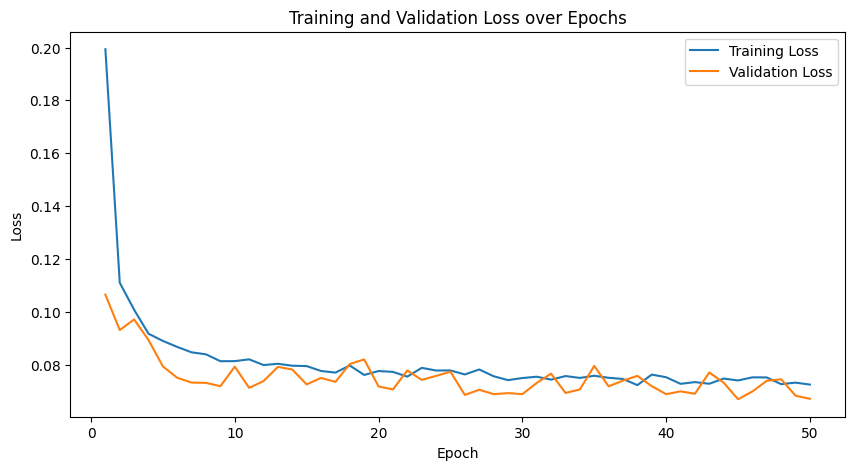

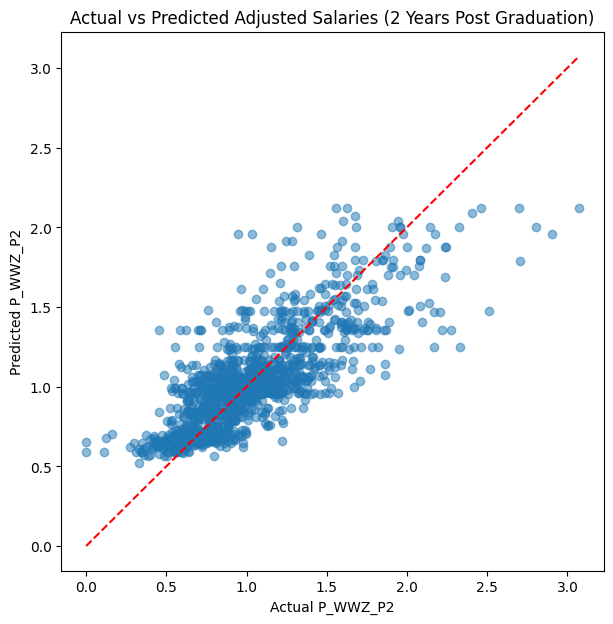

In [124]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Start with your given code
graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 4]
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

features = graduates_data_copy[['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']]
target = graduates_data_copy['P_WWZ_P2']

# One-hot encode categorical variables
features = pd.get_dummies(features, columns=['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina'])

# Convert DataFrame to numpy array
X = features.values
y = target.values

# Split the data into training, validation, and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1765, random_state=42
)  # 0.1765 * 0.85 ≈ 0.15

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
input_dim = X_train_tensor.shape[1]
model = RegressionModel(input_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with validation
epochs = 50
batch_size = 32
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))
    epoch_loss = 0.0

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = epoch_loss / (X_train_tensor.size(0) / batch_size)
    train_losses.append(avg_train_loss)

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss.item():.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor).numpy()
    y_test_actual = y_test_tensor.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")

# Visualize the training and validation loss
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()

# Visualize the predictions
plt.figure(figsize=(7,7))
plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Actual P_WWZ_P2")
plt.ylabel("Predicted P_WWZ_P2")
plt.title("Actual vs Predicted Adjusted Salaries (2 Years Post Graduation)")
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')  # Line y=x
plt.show()


In [ ]:
def predict_salary(model, input_features, feature_columns):
    """
    Predicts salary using the trained PyTorch model.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        input_features (list or dict): Input features in the order:
            [ 'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
            The values should be the original categorical values (strings).
        feature_columns (list): List of feature column names used during training.

    Returns:
        float: Predicted adjusted salary (P_WWZ_P2).
    """
    import pandas as pd
    import torch

    # Create DataFrame from input_features
    if isinstance(input_features, dict):
        input_df = pd.DataFrame([input_features])
    elif isinstance(input_features, list):
        input_df = pd.DataFrame([input_features], columns=['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina'])
    else:
        raise ValueError("input_features must be a list or dict")

    # One-hot encode the input features
    input_df_encoded = pd.get_dummies(input_df, columns=['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina'])

    # Ensure all feature columns used in training are present
    for col in feature_columns:
        if col not in input_df_encoded.columns:
            input_df_encoded[col] = 0

    # Reorder columns to match training data
    input_df_encoded = input_df_encoded[feature_columns]

    # Ensure all data is of numerical type
    input_df_encoded = input_df_encoded.astype(float)

    # Convert to numpy array
    input_array = input_df_encoded.values

    # Convert to torch tensor
    input_tensor = torch.tensor(input_array, dtype=torch.float32)

    # Set model to evaluation mode
    model.eval()

    # Predict
    with torch.no_grad():
        prediction = model(input_tensor)

    # Return the prediction as float
    return prediction.item()

# After one-hot encoding
feature_columns = features.columns.tolist()

# Sample input features with original category labels
input_features = {
    'P_WOJ': 6,         # Original category label as a string
    'P_POZIOM': 1,        # Original category label as a string
    'P_FORMA': 0,         # Original category label as a string
    'Dziedzina': 3  # Original category label as a string
}

# Call the function
predicted_salary = predict_salary(model, input_features, feature_columns)

print(f"Predicted Salary: {predicted_salary:.4f} x Median")

Predicted Salary: 2.1231
